# Integrazione e Derivazione

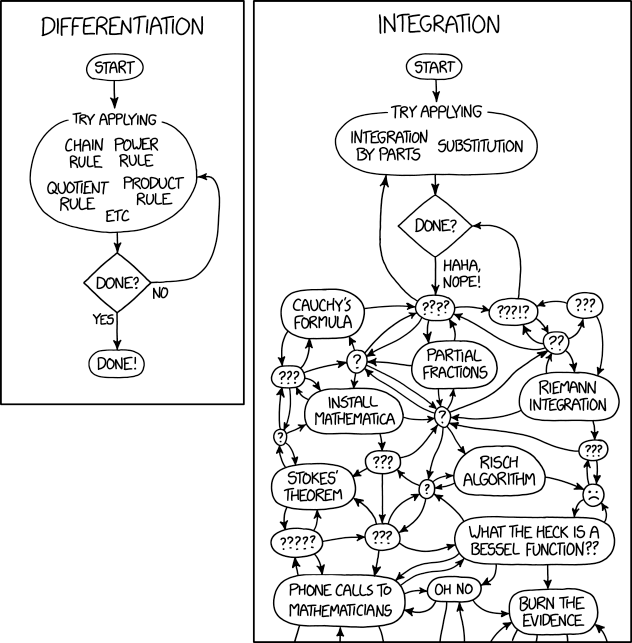

[xkcd](https://xkcd.com/2117/)

### Import

In [41]:
import numpy as np
from  scipy import integrate
import math
import matplotlib.pyplot as plt
import matplotlib.colors as colors

## Integrazione

Consideriamo la funzione di seguito per applicare diverse tecniche di integrazione numerica:
$$f(x) = 6\, x^2 - \frac{4}{7}x^3$$

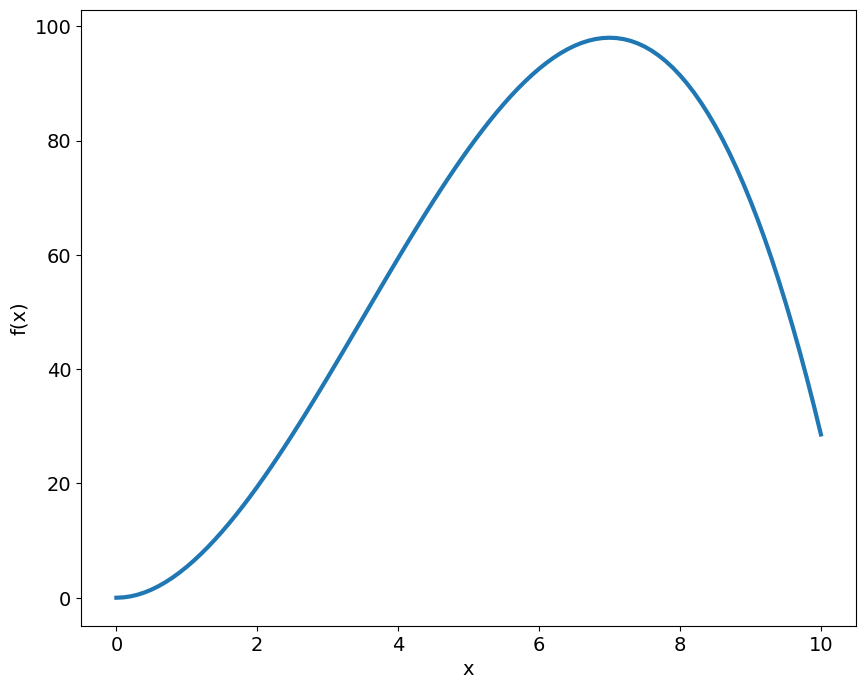

In [42]:
# Esempioo di funzione da integrare
def f1(x):
    return 6*x**2 - 4/7*x**3

#xx = np.arange(10, 90, 1)
#xx = np.arange(1, 9.1, 0.1)
xx = np.arange(0, 10.1, 0.1)

ff = f1(xx)
#print(xx)
#print(ff)

#plt.xkcd()  # Yes...
plt.subplots(figsize=(10,8))
plt.plot(xx,ff, linewidth=3)
plt.xlabel('x',    fontsize=14)
plt.ylabel('f(x)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.ylim(0, 100)
plt.show()


$$\int_0^{10} f(x) \; dx = 2 \, x^3 - \frac{1}{7} \, x^4 \; \bigg|_0^{10}  $$

In [43]:
# Integrale analitico
def fid(x):
    return 2*x**3 -1/7*x**4


ii = fid(10) - fid(0)

print('Integrale analitico {:}'.format(ii))

Integrale analitico 571.4285714285716


[0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5] [ 1.42857143 11.57142857 28.57142857 49.         69.42857143 86.42857143
 96.57142857 96.42857143 82.57142857 51.57142857]


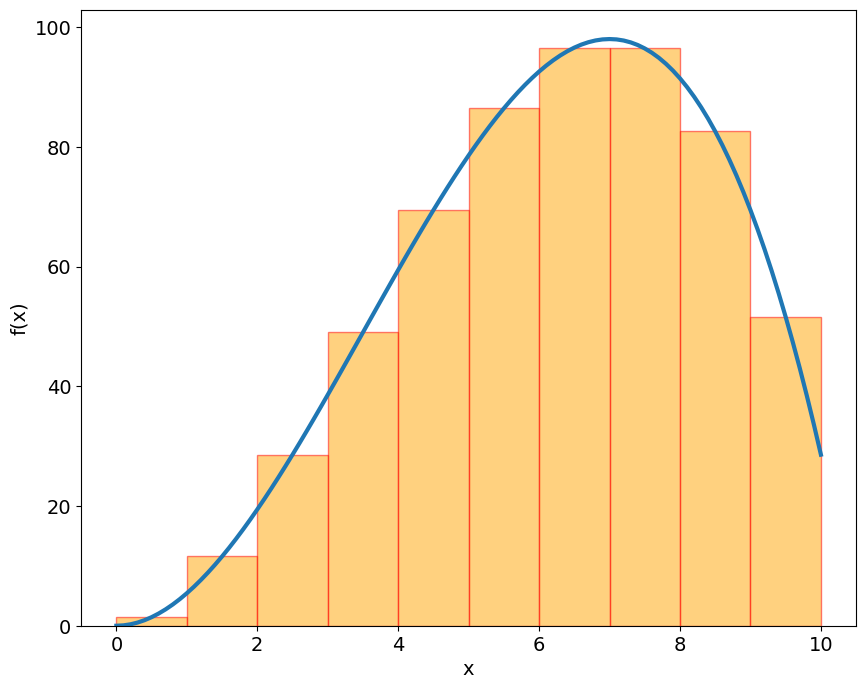

In [44]:
#Integrale rettangoli - 8 bin
x_integral_10 = np.arange(0, 10+1, 1)
x_centre_10   = 0.5 *( x_integral_10[:-1] + x_integral_10[1:] )

print(x_centre_10, f1(x_centre_10) )

plt.subplots(figsize=(10,8))
plt.plot(xx,ff, linewidth=3)
plt.hist(x_centre_10, weights=f1(x_centre_10), bins=10, range=(0,10), alpha=0.5, color='orange', ec='red')
plt.xlabel('x',    fontsize=14)
plt.ylabel('f(x)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [45]:
# 10 bins
bw10 = 1
integral_10 = np.sum(f1(x_centre_10)*bw10)
print('Integrale con 10 bins:              {:}'.format(integral_10))
print('Differenza con integrale analitico {:} {:3.3f} %'.format(integral_10-ii, 100*(integral_10-ii)/ii))

Integrale con 10 bins:              573.5714285714287
Differenza con integrale analitico 2.1428571428571104 0.375 %


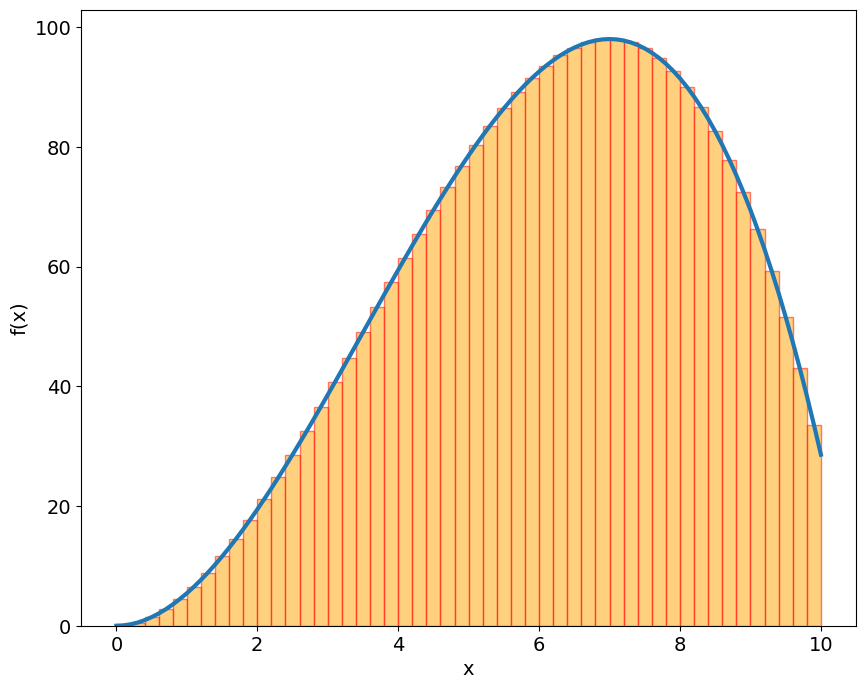

In [46]:
#Integrale rettangoli - 50 bin
x_integral_50 = np.arange(0, 10+0.2, 0.2)
x_centre_50   = 0.5 *( x_integral_50[:-1] + x_integral_50[1:] )

plt.subplots(figsize=(10,8))
plt.plot(xx,ff, linewidth=3)
plt.hist(x_centre_50, weights=f1(x_centre_50), bins=50, range=(0,10), alpha=0.5, color='orange', ec='red')
plt.xlabel('x',    fontsize=14)
plt.ylabel('f(x)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [47]:
# 50 bins
bw50 = 0.2
integral_50 = np.sum(f1(x_centre_50)*bw50)
print('Integrale con 50 bins:              {:}'.format(integral_50))
print('Differenza con integrale analitico {:} {:3.3f} %'.format(integral_50-ii, 100*(integral_50-ii)/ii ))

Integrale con 50 bins:              571.5142857142858
Differenza con integrale analitico 0.08571428571428896 0.015 %


### Regola del Trapezio

Approssima l'area sottesa dalla curva con un trapezio.

Volendo calcolare
$$\int_a^b f(x)\; dx$$

e suddividendo l'intervallo di integrazione $[a:b]$ in $N$  sottointervalli uguali:

$$
h = \frac{b-a}{N}
$$

il bin numero $k$ è compreso fra $a + (k-1)h$  e $a+kh$

per cui l'area del trapezio corrispondnete è:

$$
A_k = \frac{1}{2} \, h \, \left[ f(a + (k-1)h ) + f(a + kh)  \right]
$$.

L'integrale secondo la regola del trapezio corrisponde a:

$$
I_T(a,b) = \sum_{k=1}^N A_k = \frac{1}{2}h \sum_{k=1}^N  f(a + (k-1)h ) + f(a + kh)
$$

$$
= h \left[ \frac{1}{2}f(a) +  f(a+h) +  f(a+2h) + ... + \frac{1}{2}f(b) \right]
$$

$$ 
= h \left[ \frac{1}{2}f(a) +  \frac{1}{2}f(b) + \sum_{k=1}^{N-1} f(a+kh) \right]
$$

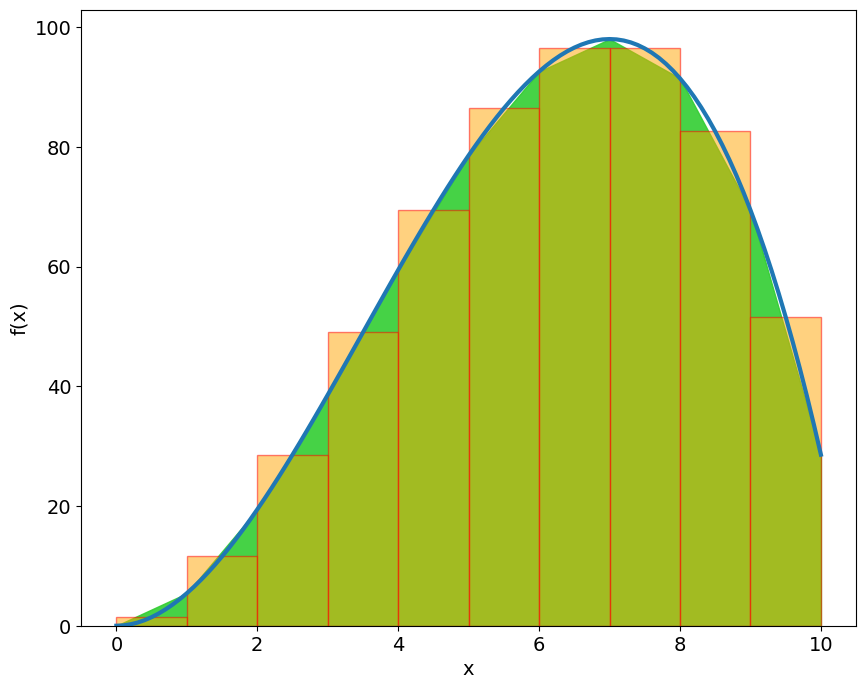

In [48]:
#Integrale trapezio - 10 bin

plt.subplots(figsize=(10,8))
plt.plot(xx,ff, linewidth=3)
plt.fill_between(x_integral_10, f1(x_integral_10), alpha=0.9, color='limegreen')
plt.hist(x_centre_10, weights=f1(x_centre_10), bins=10, range=(0,10), alpha=0.5, color='orange', ec='red')
plt.xlabel('x',    fontsize=14)
plt.ylabel('f(x)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [49]:
#integrale Trapezio 10 bins

i_trapezioidal_10 =  bw10* ( 0.5*f1(x_integral_10[0])+0.5*f1(x_integral_10[-1])+np.sum(f1(x_integral_10[1:-1])))

print('Integrale Trapezio con 10 bins:     {:}'.format(i_trapezioidal_10))
print('Differenza con integrale analitico {:} {:3.3f} %'.format(i_trapezioidal_10-ii, 100*(i_trapezioidal_10-ii)/ii))
      

Integrale Trapezio con 10 bins:     567.1428571428571
Differenza con integrale analitico -4.285714285714448 -0.750 %


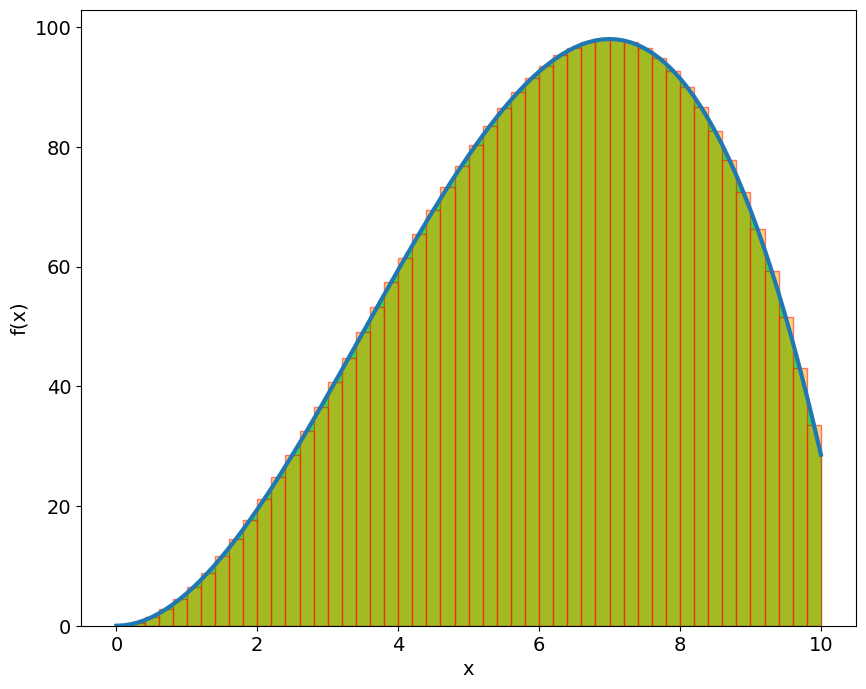

In [50]:
# Integral e trapezo 50 bin 
plt.subplots(figsize=(10,8))
plt.plot(xx,ff, linewidth=3)
plt.fill_between(x_integral_50, f1(x_integral_50), alpha=0.9, color='limegreen')
plt.hist(x_centre_50, weights=f1(x_centre_50), bins=50, range=(0,10), alpha=0.5, color='orange', ec='red')
plt.xlabel('x',    fontsize=14)
plt.ylabel('f(x)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [51]:
#integrale Trapezio 40 bins

i_trapezioidal_50 =  bw50* ( 0.5*f1(x_integral_50[0])+0.5*f1(x_integral_50[-1])+np.sum(f1(x_integral_50[1:-1])))

print('Integrale Trapezio con 50 bins:     {:}'.format(i_trapezioidal_50))
print('Differenza con integrale analitico {:} {:3.3f} %'.format(i_trapezioidal_50-ii, 100*(i_trapezioidal_50-ii)/ii))

Integrale Trapezio con 50 bins:     571.2571428571431
Differenza con integrale analitico -0.17142857142846424 -0.030 %


### Regola di Cavalieri-Simpson

Conosciuta in inglese principalmente come regola di Simpson (`Simpson's rule`).
                                      

Questo metodo  approssima la funzione da integrare con una curva quadratica (polinomio di secondo grado) considerando due intervalli adiacenti (quindi tre punti di campionamento consecutivi sulla curva).

Supponiamo di considerare la funzione $f(x)$ in tre punti:

$
x = -h, 0, +h
$

e di approssimare la funzione $f(x)$ con $Ax^2 + Bx +C$

$ f(-h) = Ah^2 - Bh +C$

$f(0) = C$

$f(h) = Ah^2 + Bh +C$


Risolvendo il sistema otteniamo:

\begin{eqnarray}
 A & = & \frac{1}{h^2}\left[\frac{1}{2}f(-h) -f(0) +\frac{1}{2}f(h) \right]\\
 B & = & \frac{1}{2h}\left[f(h) -f(-h) \right]\\
 C & = & f(0)
\end{eqnarray}

e 

$$ 
\int_{-h}^h (Ax^2 + Bx +C) dx = \frac{2}{3} A h^3 + 2Ch = \frac{1}{3}h \left[ f(-h) +4f(0) + f(h) \right]  
$$

Generalizzando per un intervallo a-b suddiviso in un numero $N$ pari  di sottointervalli di uguale  larghezza $h$ ottenioamo la regola di Cavaliero-Simpson estesa:

\begin{eqnarray}
\int_a^b f(x) & \simeq  & \frac{1}{3} h \left[ f(a) +4f(a+h) + f(a+2h) \right] \\
 &&+ \frac{1}{3} h \left[ f(a+2h) +4f(a+3h) + f(a+4h) \right] + ... \\
 && + \frac{1}{3} h \left[ f(a+(N-2)h) +4f(a+(N-1)h) + f(b) \right]
 \end{eqnarray}
 
raccogliendo i termini comuni otteniamo:

\begin{eqnarray}
\int_a^b f(x) & \simeq  & \frac{1}{3} h \left[ f(a) +4f(a+h) + 2f(a+2h) +4f(a+3h) + ... + f(b) \right] \\
& = & \frac{1}{3} h \left[ f(a) \, + f(b) \, + 4 \sum_{k \,disp.}^{N-1} f(a + kh) + 2 \sum_{k \, pari}^{N-2} f(a + kh) \right] \\
\end{eqnarray}

che può  anche essere riscritta come:

$$
\int_a^b f(x) \simeq  \frac{1}{3} h \left[ f(a) \, + f(b) \, + 4 \sum_{k=1}^{N/2} f\left(a + (2k-1)h\right) + 2 \sum_{k=1}^{N/2-1} f(a + 2kh ) \right]
$$

Calcoliamo l'integrale della funzione precendente utilizzando la regola di Cavalieri-Simpson

In [52]:
#integrale Cavalieri-Simpson 10 bins
sum_odd  = 0
sum_even = 0

for k in range(1,10,2):
    print( k, x_integral_10[k], f1(x_integral_10[k] ) )
    sum_odd = sum_odd + 4*f1(x_integral_10[k])

print()

for k in range(2,10,2):
    print( k, x_integral_10[k], f1(x_integral_10[k] ) )
    sum_even = sum_even + 2*f1(x_integral_10[k])

print( '\n', sum_odd, sum_even, '\n')
i_simpson_10 =  1/3. * bw10* ( f1(x_integral_10[0]) + f1(x_integral_10[-1]) + sum_odd + sum_even )
print('Integrale Cavalieri-Simpson con 10 bins:  {:}'.format(i_simpson_10))
print('Differenza con integrale analitico        {:} {:} %'.format(i_simpson_10-ii, 100*(i_simpson_10-ii)/ii))
      

1 1 5.428571428571429
3 3 38.57142857142857
5 5 78.57142857142857
7 7 98.0
9 9 69.42857142857144

2 2 19.42857142857143
4 4 59.42857142857143
6 6 92.57142857142858
8 8 91.42857142857144

 1160.0 525.7142857142858 

Integrale Cavalieri-Simpson con 10 bins:  571.4285714285713
Differenza con integrale analitico        -2.2737367544323206e-13 -3.97903932025656e-14 %


In [53]:
#integrale Cavalieri-Simpson 50 bins
sum_odd  = 0
sum_even = 0

for k in range(1,50,2):
    #print( k, x_integral_50[k], f1(x_integral_50[k] ) )
    sum_odd = sum_odd + 4*f1(x_integral_50[k])

#print()

for k in range(2,50,2):
    #print( k, x_integral_50[k], f1(x_integral_50[k] ) )
    sum_even = sum_even + 2*f1(x_integral_50[k])

print( '\n', sum_odd, sum_even, '\n')
i_simpson_50 =  1/3. * bw50* ( f1(x_integral_50[0]) + f1(x_integral_50[-1]) + sum_odd + sum_even )
print('Integrale Cavalieri-Simpson con 50 bins: {:}'.format(i_simpson_50))
print('Differenza con integrale analitico       {:} {:} %'.format(i_simpson_50-ii, 100*(i_simpson_50-ii)/ii))


 5717.714285714288 2825.1428571428573 

Integrale Cavalieri-Simpson con 50 bins: 571.4285714285716
Differenza con integrale analitico       0.0 0.0 %


### Scipy Integrate

In [54]:
# scipy simpson and trapezoid 10 bins

print('Scipy Trapezio 10 bin :', integrate.trapezoid(f1(x_integral_10), dx=1) )
print('Scipy Simpson  10 bin :', integrate.simpson(  f1(x_integral_10), dx=1) )

Scipy Trapezio 10 bin : 567.1428571428571
Scipy Simpson  10 bin : 571.4285714285714


In [55]:
# scipy simpson and trapezoid 50 bins
print('Scipy Trapezio 50 bin :', integrate.trapezoid(f1(x_integral_50), dx=0.2) )
print('Scipy Simpson  50 bin :', integrate.simpson(  f1(x_integral_50), dx=0.2) )

Scipy Trapezio 50 bin : 571.257142857143
Scipy Simpson  50 bin : 571.4285714285716


#### Esempio: Limite di Diffrazione di un Telescopio

La risoluzione limite di un telescopio è dettata dalla diffrazione nel sistema ottico.

Assumendo un'apertura e una lunghezza focale unitari (D=$f$=1) abbiamo una intensità  di luce:

$$ 
I(r) = \left( \frac{J_1(kr)}{kr} \right)^2
$$

dove 

$r$ è la distanza sul piano focale  dal centro di diffrazione,

$\lambda$ è la lunghezza d'onda della luce considerata,

$k = \frac{2 \pi}{\lambda}$,

$J_q(x)$ è una funzione di Bessel.

Le funzioni di Bessel sono definite come:

$$ 
J_m(x) = \frac{1}{\pi}\int_0^{\pi} cos(m\theta -x\, sin(\theta) ) \; d\theta
$$

Con $m$ intero non negativo e $x\ge 0$

Esercizio: definire la funzione J(m,x) e fare il 
grafico della  figura di diffrazione circolare per alcune lunghezze d'onda (500 nm )
    

In [56]:
# function J(m,x)
def bessel(m,x):
    """ 
    Bessel function J(m,x)
    m : non negative integer
    x >=0 
    """
    theta  = np.arange(1001)*math.pi/1000
    if np.isscalar(x):
        ftheta = np.cos(m*theta - x * np.sin(theta))
        return integrate.simpson(ftheta, theta)/math.pi
    else:
        bv = np.empty(0)
        for xv in x:
            ftheta = np.cos(m*theta - xv * np.sin(theta))
            bv = np.append(bv, integrate.simpson(ftheta, theta)/math.pi)
        return bv


In [57]:
xx = np.array(0)

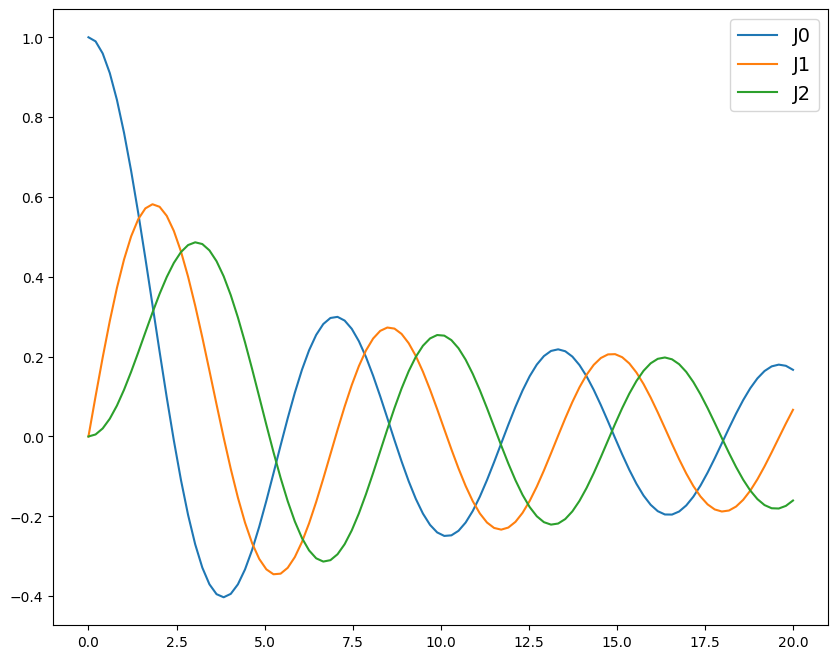

In [58]:
# Bessel functions plots
bx = np.linspace(0, 20, 100)
j0 =  bessel(0,bx)
#j0 = np.array( [ bessel(0,x) for x in bx] ) 
j1 = np.array( [ bessel(1,x) for x in bx] ) 
j2 = np.array( [ bessel(2,x) for x in bx] ) 


plt.subplots( figsize=(10,8))
plt.plot(bx, j0, label='J0')
plt.plot(bx, j1, label='J1')
plt.plot(bx, j2, label='J2')
plt.legend(fontsize=14)
plt.show()

In [59]:
# function I(r,lambdat)
def I(r, lambdat):
    """
    Diffraction image intensity I(r, lamda)
    r       : distance from the diffraction image centre 
    lambdat : light wavelength
    """
    k = 2*math.pi/lambdat
    return (bessel(1, k*r)/(k*r))**2

Text(0, 0.5, 'Diffraction I(r)')

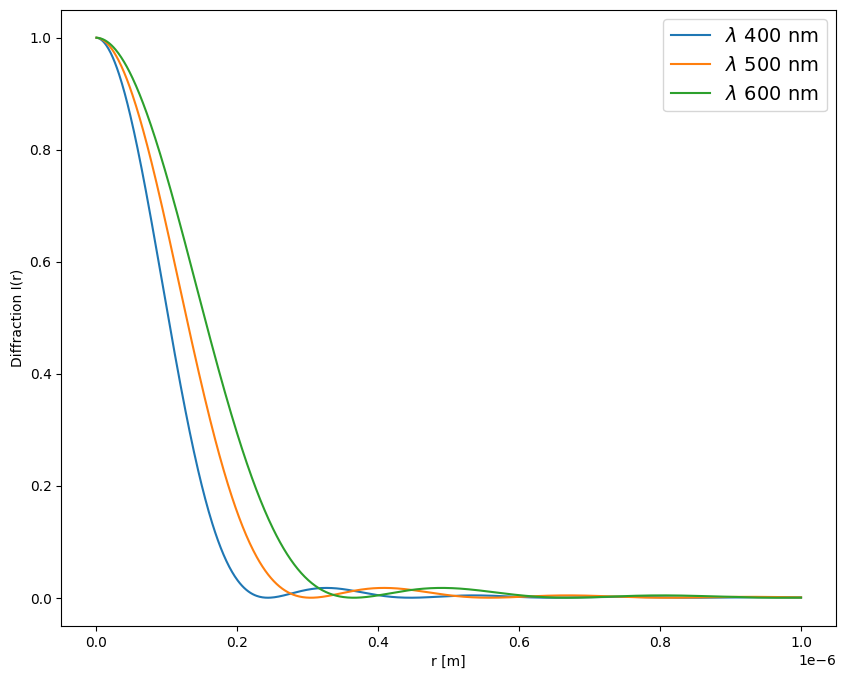

In [60]:
# Distanza dal cerntro sul piano focale
rfocal = np.linspace(1e-9, 1e-6, 999)

# Intensità figura di diffrazione per diverse lunghezze d'onda
#intensity_400 = np.array( [ I(r, 400) for r in rfocal ])
intensity_400 = I(rfocal, 400e-9)
intensity_500 = np.array( [ I(r, 500e-9) for r in rfocal ])
intensity_600 = np.array( [ I(r, 600e-9) for r in rfocal ])

#moltiplico per 4 l'itensità per ottenere un picco di altezza pari ad 1 (I(r) --> (1/2)^2 per r --> 0)
plt.subplots( figsize=(10,8))
plt.plot(rfocal, 4*intensity_400, label='$\lambda$ 400 nm')
plt.plot(rfocal, 4*intensity_500, label='$\lambda$ 500 nm')
plt.plot(rfocal, 4*intensity_600, label='$\lambda$ 600 nm')
plt.legend(fontsize=14)
plt.xlabel('r [m]')
plt.ylabel('Diffraction I(r)')
#plt.yscale('log')

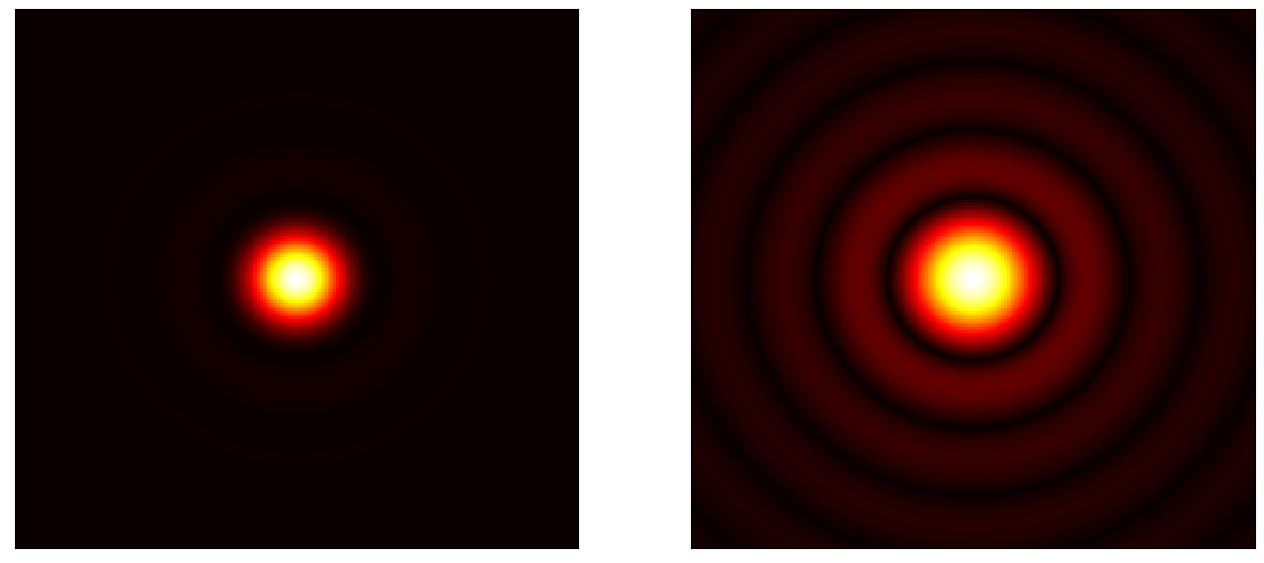

In [61]:
# Grafico figure di diffrazione a 500 nm
xfocal = np.linspace(-1e-6, 1e-6, 200)
yfocal = np.linspace(-1e-6, 1e-6, 200)

# Creo griglia di punti 2D 
Xf,Yf = np.meshgrid(  xfocal, yfocal )
Rf = np.sqrt(Xf**2+Yf**2)

Zf = np.array([ I(r, 500e-9) for r in Rf ])


img, ax = plt.subplots(1,2, figsize=(16,7))
ax[0].axes.xaxis.set_visible(False)
ax[0].axes.yaxis.set_visible(False)
ax[1].axes.xaxis.set_visible(False)
ax[1].axes.yaxis.set_visible(False)

ax[0].pcolormesh(Xf, Yf, Zf, cmap='hot', shading='auto' )
ax[1].pcolormesh(Xf, Yf, Zf, cmap='hot', shading='auto', norm=colors.PowerNorm(gamma=0.5))


### Telescopi spaziali Hubble e James Webb 

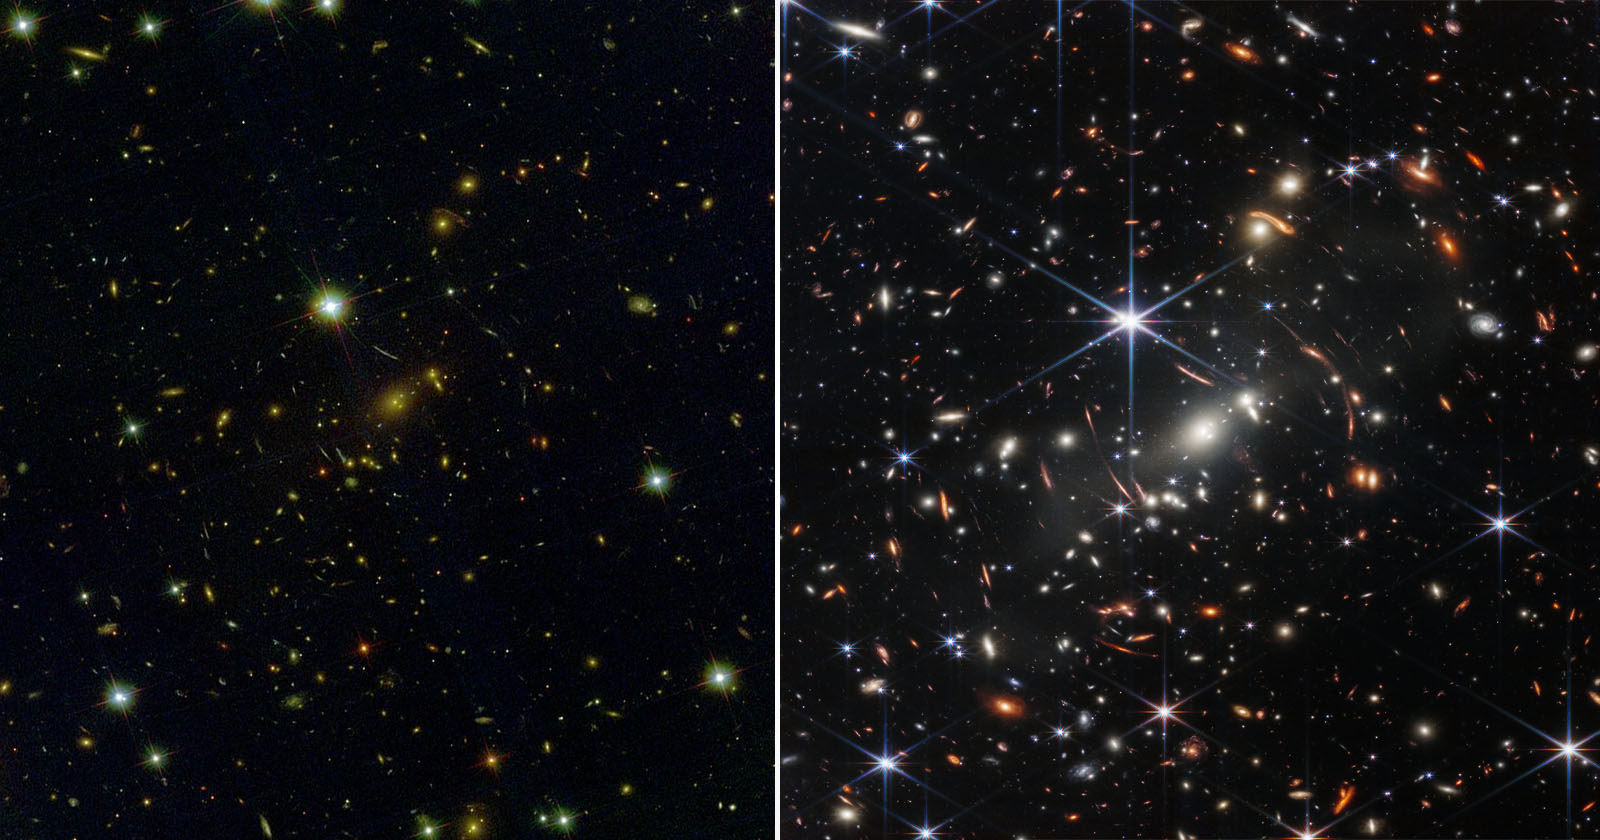

In generale per un  telescopio di Diametro D e lunghezza focale $f$ abbiamo per l'intensità dell'immagine di diffrazione: 

$$
I(r) = \left( \frac{J_1\left(\frac{\pi D}{\lambda f}r\right)}{\frac{\pi D}{\lambda f}r} \right)^2
$$

dove 


$r$ è la distanza sul piano focale  dal centro di diffrazione,

$\lambda$ è la lunghezza d'onda della luce considerata,

D è il diametro dello speccio primario;

$f$ la lunghezza focale del telescopio.

In [62]:
#Diametri
d_hst   = 2.4 # m
d_jwst  = 6.5 # m

# Lungezza focale
f_hst  = 57.6  # m (f/24)
f_jwst = 131.4 # m (f/20.2) 

In [63]:
# Immagine di diffrazione per diversi diametri e lughezze focali
def Id(r, lambdat, D, f):
    """
    Diffraction image intensity for a telescope of diametre D: I(r, lamdat, D)
    r       : distance from the diffraction image centre 
    lambdat : light wavelength
    D       : telescope diameter
    f       : telescope focal length
    """
    kh = math.pi/lambdat  * D/f
    return (bessel(1, kh*r)/(kh*r))**2

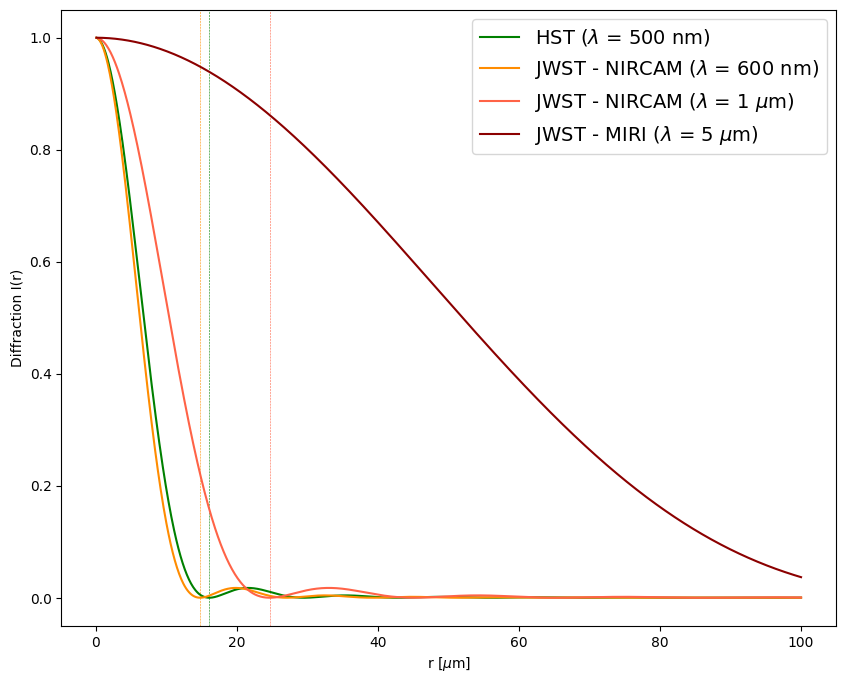

In [64]:
rfocal_tel = np.linspace(0.1e-6, 100e-6, 999)

# Intensotà per HST e JWST a diverse lunghezze d'onda
# moltiplico pe 4 per ottenere picco di altezza 1
HST_intensity_500    = 4*np.array( [ Id(r,   550e-9, d_hst,  f_hst)  for r in rfocal_tel ]) # Visibile          (lambda = 500 nm)
JWST_intensity_600   = 4*np.array( [ Id(r,   600e-9, d_jwst, f_jwst) for r in rfocal_tel ]) # Visibile          (lambda = 600 nm  )
JWST_intensity_1000  = 4*np.array( [ Id(r,  1000e-9, d_jwst, f_jwst) for r in rfocal_tel ]) # Vicino Infrarosso (lambda = 1 um  )
JWST_intensity_10000 = 4*np.array( [ Id(r,  5000e-9, d_jwst, f_jwst) for r in rfocal_tel ]) # Medio Infrarosso  (lambda = 5 um )

# per il gafico converto r in um (*1e6)
plt.subplots( figsize=(10,8))
plt.axvline(1.22*0.550*f_hst/d_hst,   color='green',      linewidth=0.4, linestyle='dashed')
plt.axvline(1.22*0.600*f_jwst/d_jwst, color='darkorange', linewidth=0.4, linestyle='dashed')
plt.axvline(1.22*1.000*f_jwst/d_jwst, color='tomato',     linewidth=0.4, linestyle='dashed')
#plt.axvline(1.22*5.000*f_jwst/d_jwst, color='darkred',    linewidth=0.4, linestyle='dashed')


plt.plot(rfocal_tel*1e6, HST_intensity_500,    color='green',      label='HST ($\lambda$ = 500 nm)')
plt.plot(rfocal_tel*1e6, JWST_intensity_600,   color='darkorange', label='JWST - NIRCAM ($\lambda$ = 600 nm)')
plt.plot(rfocal_tel*1e6, JWST_intensity_1000,  color='tomato',     label='JWST - NIRCAM ($\lambda$ = 1 $\mu$m)')
plt.plot(rfocal_tel*1e6, JWST_intensity_10000, color='darkred',    label='JWST - MIRI ($\lambda$ = 5 $\mu$m)')


plt.legend(fontsize=14)
plt.xlabel(r'r [$\mu$m]')
plt.ylabel('Diffraction I(r)')
#plt.yscale('log')
plt.show()

### Errori negli Integrali

L'errore negli integrali numerici è principalmente legato all' Errore di Approssimazione.

Proviamo a stimare l'errore di approssimazione a partire dallo sviluppo in serie di Taylor per la finzione da integrare $f(x)$ nell'intervallo fra $a$ e $b$ $ \left( \int_a^b f(x)\, dx \right)$.

Iniziamo considerando la regiola del trapezio nei diversi punti di campionamento $x_k$ dove $x_k = a + kh$.
Considerando lo sviluppo in serie attorno al valore $x_{k-1}$:

$$
f(x) = f(x_{k-1}) + (x-x_{k-1}) f'(x_{k-1}) + \frac{1}{2} (x-x_{k-1})^2 f''(x_{k-1}) + ...
$$

L'integrale corrispondente fra $x_{k-1}$ e $x_{k}$ sarà:

$$
\int_{x_{k-1} }^{x_k} f(x) \, dx =  f(x_{k-1}) \int_{x_{k-1} }^{x_k} dx +  f'(x_{k-1}) \int_{x_{k-1} }^{x_k} (x-x_{k-1}) dx  + \frac{1}{2} f''(x_{k-1}) \int_{x_{k-1} }^{x_k} (x-x_{k-1})^2 dx + ...
$$

che tramite la sostituzione $u = x-x_{k-1}$ diventa:

\begin{eqnarray}
\int_{x_{k-1} }^{x_k} f(x) \, dx & = & f(x_{k-1}) \int_0^h du \,  +  f'(x_{k-1}) \int_0^h u du \,  +  \frac{1}{2} f''(x_{k-1}) \int_0^h u^2  du \, + \, ... \\
 & = & h f(x_{k-1}) \, + \frac{1}{2} h^2 f'(x_{k-1}) \, + \frac{1}{6} h^3 f''(x_{k-1}) + O(h^4),
\end{eqnarray}

Similmente con un espansione in serie attorno ad $x_k$ si ottiene:

$$
\int_{x_{k-1} }^{x_k} f(x) \, dx =  h f(x_{k}) \, - \frac{1}{2} h^2 f'(x_{k}) \, + \frac{1}{6} h^3 f''(x_{k}) - O(h^4),
$$

e prendendo la media degli integrali utilizzando l'espansione in $x_{k-1}$ e $x_k$:

$$
\int_{x_{k-1} }^{x_k} f(x) \, dx = \frac{1}{2} h [ f(x_{k-1}) + f(x_{k}) ] \, + \frac{1}{4} h^2 [ f'(x_{k-1}) - f'(x_{k}) ] + \frac{1}{2} h^3 [ f''(x_{k-1}) + f''(x_{k}) ] + O(h^4).
$$

Sommando tutti i $k$  intervalli otteniamo l'integrale di interesse:

\begin{eqnarray}
\int_a^b f(x)\, dx  =  \sum_{k=1}^{N} \int_{x_{k-1} }^{x_k} f(x) dx & = & \frac{1}{2} h \sum_{k=1}^{N} \left[f(x_{k-1}) + f(x_{k})\right]  \\
&& + \frac{1}{4} h^2  \left[f'(a) + f'(b)\right] \\
&& + \frac{1}{12} h^3 \sum_{k=1}^{N} \left[f''(x_{k-1}) + f''(x_{k})\right] 
\end{eqnarray}

Osservando l'ultimo risultato,  il  primo termine corrsiponde alla regola del trapezio stessa; ciò significa che i restanti termini corrispondono alla differenza tra il risoltato che si ottiene con la regola del trraopezio e l'integrale analatico, quindi all'errore di approssimazione stesso.
Il secondo termine, proporzionale ad $h^2$ dipende solo dal valore di $f'(x)$ negli estremi di ingtegrazione $a$ e $b$.
Il terzo termine in $h^3$, a meno di una costante di proporzionalità corrisponde alla regola del trapezio per $f''(x)$. Considerando che l'integrale di $f''(x)$ è $f'(x)$, dopo alcune sostiutuzioni otteniamo:

$$
\int_a^b f(x)\, dx  = \frac{1}{2} h \sum_{k=1}^{N} \left[f(x_{k-1}) + f(x_{k})\right] + \frac{1}{12}  h^2  \left[f'(a) + f'(b)\right] + O(h^4)
$$ 


da cui si può conludere che l'errore di approssimazione per la regola del trapezio:

$$
\epsilon  = \frac{1}{12}  h^2  \left[f'(a) + f'(b)\right]
$$

che è al secondo ordine in $h$.

L'errore di approssimazione scende con $h$, quindi all'aumentare del numero  dei punti di campionamento $N$, fino al limite imposto dalla precisione numerica della macchina $C$ ($\sim 10^{-16}$ in python), quindi fino al punto in cui:

$$
\epsilon = \frac{1}{12}  h^2  \left[f'(a) + f'(b)\right] \simeq C \int_a^b f(x) dx.
$$

da $ h = \frac{b-a}{N}$ possiamo ricavare i corrispondnetnti valori limite per $h$ ed $N$:

\begin{eqnarray}
h & \simeq & \sqrt{ \frac{12  \int_a^b f(x) dx  }{ f'(a) - f'(b) }  } C^{1/2} \\
N & \simeq  (b-a) & \sqrt{  \frac{f'(a) - f'(b) }{ 12  \int_a^b f(x) dx  } } C^{-1/2}.
\end{eqnarray}

da cui si può vedere che gli errori di arrotindamento inizieranno a divenire importanti per $N \simeq 10^8$.

#### Errori per Regola di Simpson 

Per l'integrazione secondo la regola di Simpson si possono sviluppare calcoli simili ottenendo come errore di approssimazione:

$$
\epsilon = \frac{1}{90} h^4 [f'''(a) - f'''(b)]
$$

da cui vediamo che la regola di Simpson corrisponde ad una integrazione al trezo ordine (errore al quarto ordine di $h$) cioè due ordini più precisa della regola del trapezio. 

Ripetendo il ragionamento per gli errori di arrotondamento otteniamo un limite su $N$  per la regola di Simpson:

$$ 
N \simeq  (b-a)  \sqrt[4]{  \frac{f'''(a) - f'''(b) }{ 90  \int_a^b f(x) dx  } } C^{-1/4}
$$

da cui si può stimare un tipico numero massimo di campionamenti dell'ordine di $N \simeq 10^4$.

### Scansione e verifica Errori di Approssimazione 

$$
f(x) = 10 \sin(3x) + 6 \sin(7x), \; x \in [0, 1]
$$


$$
\int_0^1 10 \sin(3x) = -\frac{10}{3} cos(3x)  + \frac{6}{7} \sin(7x)\bigg|_0^1
$$

In [ ]:
# Funzioni f(x) e sue derivate
def fsin(x):
    return 10*np.sin(3*x) + 6*np.cos(7*x)

def fsin_prime(x):
    return 10*3 * np.cos(3*x) - 6*7 * np.sin(7*x)

def fsin_second(x):
    return -10*3**2 * np.sin(3*x) - 6*7**2 *np.cos(7*x)
    
def fsin_third(x):
    return -10*3**3 * np.cos(3*x) + 6*7**3 * np.sin(7*x)


In [ ]:
# Intgrale indefinito di f(x) 
def Ifsin(x):
    return -10/3 * np.cos(3*x) + 6/7 * np.sin(7*x)

In [ ]:
#integrale  analitico fra 0 ed 1:
I01 = Ifsin(1) - Ifsin(0)

print('===> Integrale  analitico fra 0 ed 1: {:}'.format(I01) )

In [ ]:
# Grafico funzione f(x) 
xpl = np.linspace(0, 1, 1000)
#print(xs)

plt.subplots( figsize=(10,8))
plt.plot(xpl, fsin(xpl))
plt.show()

Scansione delle'errore stimato e calcolato direttamente in funzione del numero di campionamenti $N$ per la regiola del trapezio e la regiola di Cavalieri-Simpson.

In [ ]:
# array con i diversi valori per N
#N = np.logspace(1, 6, 6)
N = np.array( [ 5, 10, 50, 100, 200, 1000])
print(N)

In [ ]:
# errori stimati teoricamente
e_trapezio_t = np.abs( 1/12. * (1./N)**2 * (fsin_prime(0) - fsin_prime(1)) )
e_simpson_t  = np.abs( 1/90. * (1./N)**4 * (fsin_third(0) - fsin_third(1)) )

print(e_trapezio_t)
print(e_simpson_t)

In [ ]:
#errori misurati direttamente rispetto all'integrale analitico
e_trapezio_m = np.empty(0)
e_simpson_m  = np.empty(0)


for nn in N:
    xx = np.linspace(0., 1., int(nn) )
    itrap = integrate.trapezoid( fsin(xx), dx=1./nn )
    isimp = integrate.simpson(   fsin(xx), dx=1./nn )
    print(isimp)
    e_trapezio_m = np.append(e_trapezio_m, abs(itrap - I01) )
    e_simpson_m  = np.append(e_simpson_m,  abs(isimp - I01) )
    
    
print(e_trapezio_m)
print(e_simpson_m)

In [ ]:

plt.subplots( figsize=(10,8))
plt.plot( N, e_trapezio_m , label='Trapezio Misurato' )
plt.plot( N, e_simpson_m ,  label='Simpson Misurato' )
#plt.plot( N, e_trapezio_t , label='Trapezio Teorico' )
#plt.plot( N, e_simpson_t ,  label='Simpson Teorico' )
plt.plot( N, 1./N ,  label='1/N' )
plt.legend(fontsize=14)
plt.xlabel('N')
plt.ylabel(r'$\epsilon$')
plt.xscale('log')
plt.yscale('log')



## Derivate

Può capitare di dover calcolare la derivata di una serie di dati senza conoscerne la funzione analitica, diventa perciò necessario calcoalre la derivata in maniera approssimata direttamente dai dati.


Possiamo partire dalla definzione stesa di derivata:
$$
\frac{df}{dx} = \lim_{h \to 0} \frac{f(x+h) - f(x)}{h}
$$

ed ipotizzare due possibili valori approssimati:
$$
\frac{df}{dx} \simeq  \frac{f(x+h) - f(x)}{h}
$$


$$
\frac{df}{dx} \simeq  \frac{f(x) - f(x-h)}{h}
$$

### Errori

Utilizziamo lo sviluppo in serie di Taylor per stimare l'errore compioto nell'approssimazione:

$$
f(x+h) = f(x) + hf'(x) + \frac{1}{2} h^2 f''(x) + ...
$$

quindi ricavando $f'(x)$ :

$$
f'(x) = \frac{f(x+h) - f(x)}{h} - \frac{1}{2} h f''(x) + ...
$$

dunque il nostro errore legato all'approssimazione è dell'ordine di $\frac{1}{2} h | f''(x)| $  ed è linearmente dipendnete da $h$.  Per $h$ piccoli però $f(x)$ e $f(x+h)$ tenderanno ad essere molto vicini in valore introducendo un significativo errore di arrotondamento nella differenza. 
Il massimo errore per la differenza è dell'ordine di $2C f(x)$ con $C \sim 10^{-16}$.
L'errore totale puòessre stimato come:

$$
\epsilon = \frac{2C |f(x)|}{h} + \frac{1}{2} h | f''(x)|.
$$

Cerchiamo il valore di $h$ che minimizzi l'errore ponendo a zero la derivata  ottenendo:

$$
h = \sqrt{ 4C \bigg|\frac{f(x)}{f''(x)}\bigg|}
$$

da cui:

$$ 
\epsilon = \sqrt{ 4C | f(x) f''(x)| }
$$

dalla quale  si evince che l'errore è dell' ordine di $\sqrt{C}$ o $10^{-8}$, quindi molto maggiore rispetto alle tipiche precisioni numeriche.

### Differenza Centrale


$$
\frac{df}{dx} \simeq  \frac{f(x+\frac{h}{2}) - f(x - \frac{h}{2})}{h}
$$



Espandendo in serie $f(x+\frac{h}{2})$ e $f(x-\frac{h}{2})$ otteniamo:
$$
f(x+\frac{h}{2}) = f(x) + \frac{1}{2}hf'(x) + \frac{1}{8} h^2 f''(x) +  \frac{1}{48} h^3 f'''(x) + ...
$$
$$
f(x-\frac{h}{2}) = f(x) - \frac{1}{2}hf'(x) + \frac{1}{8} h^2 f''(x) -  \frac{1}{48} h^3 f'''(x) + ...
$$

da cui:
$$
f'(x) =  \frac{f(x+\frac{h}{2}) - f(x - \frac{h}{2})}{h} -  \frac{1}{24} h^2 f'''(x) + ...
$$

l'errore legato alla approssimazione risulta ora dell'ordine di $\frac{1}{24} h^2 f'''(x)$, quindi un ordine superiore in $h$.

L'errore totale, inclusa la precisone numerica, risulta:

$$
\epsilon = \frac{2C |f(x)|}{h} + \frac{1}{24} h^2 | f'''(x)|.
$$

Seguendo la stesa procedura di minimizzazione di prima troviamo:

$$
h = \sqrt[3]{ 24 C \bigg| \frac{f(x)}{f'''(x)} \bigg| }
$$

e

$$ 
\epsilon = \sqrt[3]{ \frac{9}{8} C^2 [f(x)]^2 | f'''(x)  |}
$$

con un errore dell'ordine di $C^{2/3}$ o $10^{-10}$.


#### Dati Rumorosi

È possibile che sia necessario ottenere la derivata di dati sperimentali che non seguano una funzione definita e che siano affetti da rumore. 
Il modo più immediato per implementare la differenza centrale  per la derivata al punto di indice $i$ con valore $f(i)$ è:

$$
f'(i) = \frac{ f(i+1) - f(i-1)}{ x(i+1) - x(i-1) }.
$$

In [65]:
## Dati per derivata

npoints = 1000

# array con vlori x
der_data_x = np.arange(1000)

# array con valori segnale 
der_data_signal = np.sin(der_data_x/40) *(der_data_x-545)**2/(2000-der_data_x)

# array con valori rumore
der_data_noise = np.random.normal(scale=10, size=npoints)


# segnale + rumore 
der_data_y = der_data_signal + der_data_noise

Text(0, 0.5, 'Y')

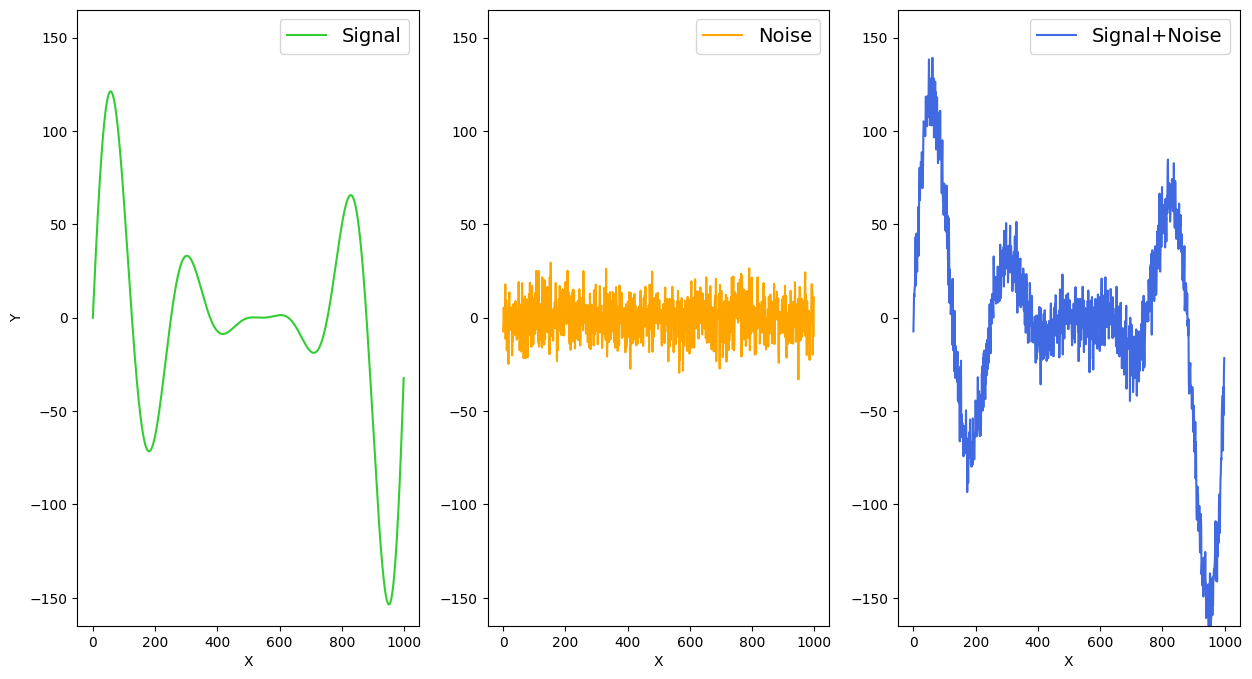

In [66]:
# Grafico seglae, rumore e segnale + rumore
fig, ax = plt.subplots(1,3, figsize=(15,8))
ax[0].plot( der_data_x, der_data_signal, color='limegreen', label='Signal' )
ax[1].plot( der_data_x, der_data_noise,  color='orange',    label='Noise' )
ax[2].plot( der_data_x, der_data_y,      color='royalblue', label='Signal+Noise' )
for a in ax:
    a.legend(fontsize=14)
    a.set_ylim(-165, 165)
    a.set_xlabel('X')
ax[0].set_ylabel('Y')

In [67]:
# Funzione che implementa una versione della differenza centarle 
# f'(i) =  [f(i+1)-f(i-1)] / [x(i+1)-x[i-1]]
def my_derivative(xx, yy):
    dd = yy[2:] - yy[:-2]
    dd = np.append(yy[1]-yy[0], dd)
    dd = np.append(dd, yy[-1]-yy[-2])
    
    hh = xx[2:] - xx[:-2]
    hh = np.append(xx[1]-xx[0], hh)
    hh = np.append(hh, xx[-1]-xx[-2])
    
    return dd/hh

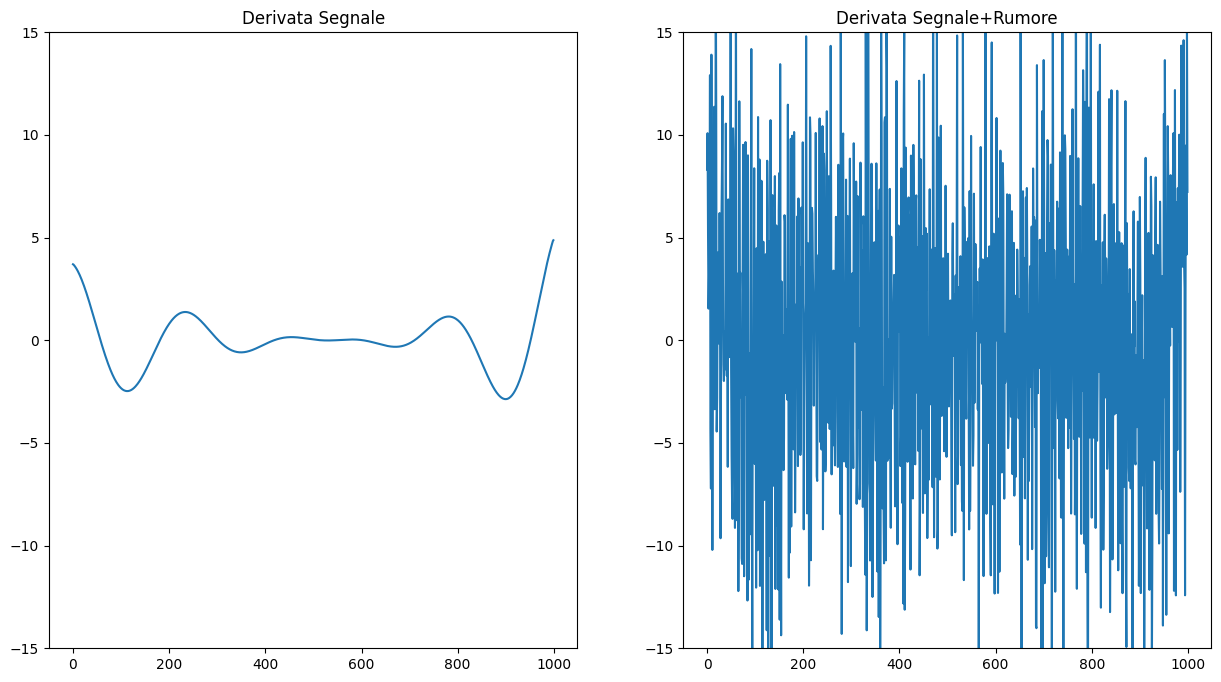

In [68]:
# Confroto grafico fra derivata del solo segnale e del segnale + rumore
fig, ax = plt.subplots(1,2, figsize=(15,8))
ax[0].set_title('Derivata Segnale')
ax[0].plot(der_data_x, my_derivative(der_data_x, der_data_signal))
ax[0].set_ylim(-15, 15)
ax[1].set_title('Derivata Segnale+Rumore')
ax[1].plot(der_data_x, my_derivative(der_data_x, der_data_y))
ax[1].set_ylim(-15, 15)
plt.show()

La derivata di dati affetti da rumore va trattata con particolare attenzione. Ci sono diversi metodi che si possonio applicare, il più semplice e immediato consiste nell'incrementare la distanza fra i punti di cui si calcola la differenza ad esempio per la derivata al punto di indice $i$ con valore $f(i)$:

$$
f'(i) = \frac{ f\left(i+\frac{n}{2}\right) - f\left(i-\frac{n}{2}\right)}{ x\left(i+\frac{n}{2}\right) - x\left(i-\frac{n}{2}\right) }
$$

dove $n$ è un intero pari. 

In [69]:
# Funzione che implementa una versione della differenza centarle con 
# f'(i) =  [f(i+nh)-f(i-nh)] / [x(i+nh)-x[i-nh]]
def my_derivative_vh(xx, yy, nh):
    dd = yy[nh:] - yy[:-nh]
    hh = xx[nh:] - xx[:-nh]
    for ih in range(int(nh/2)):
        dd = np.append(yy[nh-ih-1]-yy[0], dd)
        dd = np.append(dd, yy[-1]-yy[-(nh-ih)])
    
        hh = np.append(xx[nh-ih-1]-xx[0], hh)
        hh = np.append(hh, xx[-1]-xx[-(nh-ih)])
    
    return dd/hh

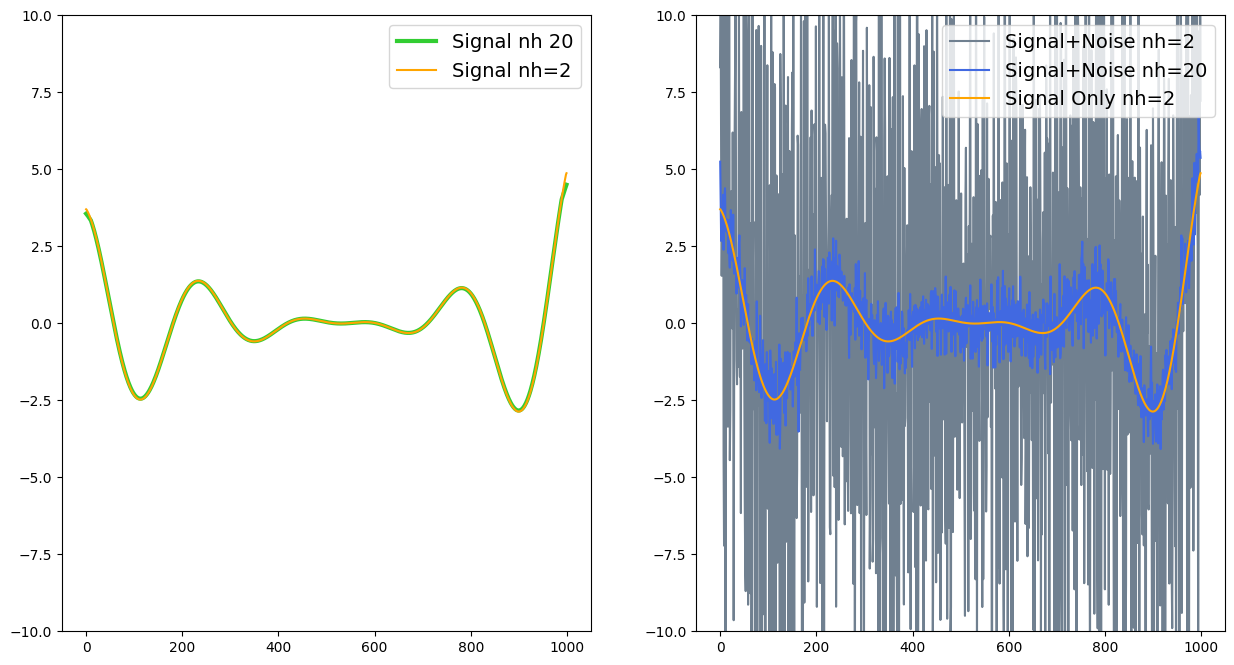

In [70]:
fig, ax = plt.subplots(1,2, figsize=(15,8))
ax[0].plot(der_data_x, my_derivative_vh(der_data_x, der_data_signal, 20), linewidth=3,color='limegreen', label='Signal nh 20')
ax[0].plot(der_data_x, my_derivative(   der_data_x, der_data_signal),     color='orange',    label='Signal nh=2')
ax[1].plot(der_data_x, my_derivative(   der_data_x, der_data_y),          color='slategray', label='Signal+Noise nh=2')
ax[1].plot(der_data_x, my_derivative_vh(der_data_x, der_data_y, 20),      color='royalblue', label='Signal+Noise nh=20')
ax[1].plot(der_data_x, my_derivative(   der_data_x, der_data_signal),     color='orange',    label='Signal Only nh=2')
for a in ax:
    a.legend(fontsize=14)
    a.set_ylim(-10, 10)


La metodilogia va adattata al caso particolare ed è possibile sia necessario adottare metodi più sofisticati.

### Numpy

La funzione `gradient` di `numpy` peremette di calcoalre la differenza centrale  

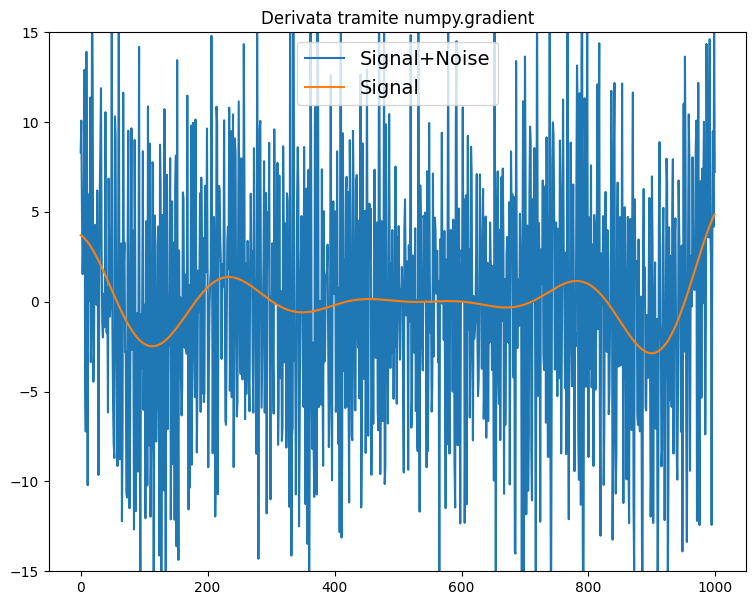

In [72]:
# Calcolo derivat del segnale e del segnale+rumore tramite numpy.gradient
npgrad_sig = np.gradient(der_data_signal, der_data_x)
npgrad_sn  = np.gradient(der_data_y,      der_data_x)


plt.subplots(figsize=(9,7))
plt.title('Derivata tramite numpy.gradient')
plt.plot(der_data_x, npgrad_sn,  label='Signal+Noise')
plt.plot(der_data_x, npgrad_sig, label='Signal')
plt.legend(fontsize=14)
plt.ylim(-15,15)
plt.show()